Enter The vegetable name :  Tomato


Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 0.4757 - val_loss: 0.7876
Epoch 2/50
1/1 [==============================] - 0s 68ms/step - loss: 0.4508 - val_loss: 0.7579
Epoch 3/50
1/1 [==============================] - 0s 54ms/step - loss: 0.4306 - val_loss: 0.7279
Epoch 4/50
1/1 [==============================] - 0s 57ms/step - loss: 0.4141 - val_loss: 0.6914
Epoch 5/50
1/1 [==============================] - 0s 60ms/step - loss: 0.3952 - val_loss: 0.6530
Epoch 6/50
1/1 [==============================] - 0s 56ms/step - loss: 0.3676 - val_loss: 0.6159
Epoch 7/50
1/1 [==============================] - 0s 70ms/step - loss: 0.3452 - val_loss: 0.5795
Epoch 8/50
1/1 [==============================] - 0s 70ms/step - loss: 0.3208 - val_loss: 0.5410
Epoch 9/50
1/1 [==============================] - 0s 60ms/step - loss: 0.2932 - val_loss: 0.5003
Epoch 10/50
1/1 [==============================] - 0s 65ms/step - loss: 0.2698 - val_loss: 0.4567
Epoch 11/50
1/1 [==============

ValueError: x and y must have same first dimension, but have shapes (4,) and (7,)

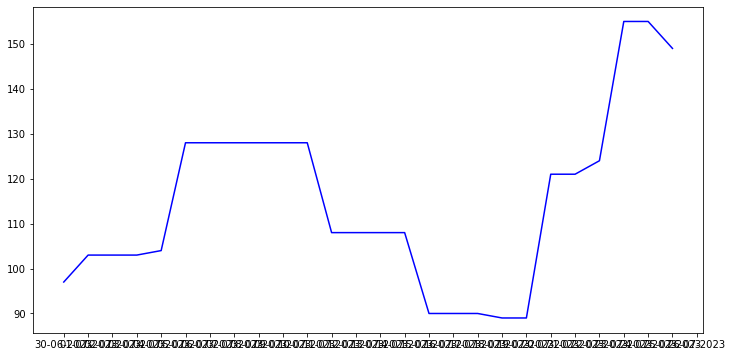

In [92]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

file = input("Enter The vegetable name : ")
data = pd.read_csv(file+'.csv')

selected_attributes = ['Prices']
data_selected = data[selected_attributes].values


scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data_selected)


time_steps = 20

X = []
y = []
for i in range(len(data_scaled) - time_steps):
    X.append(data_scaled[i:i+time_steps])
    y.append(data_scaled[i+time_steps])
X, y = np.array(X), np.array(y)

split_ratio = 0.8
split_idx = int(split_ratio * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]


model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(time_steps, len(selected_attributes))))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(selected_attributes)))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)


train_predictions_actual = scaler.inverse_transform(train_predictions)
y_train_actual = scaler.inverse_transform(y_train)
test_predictions_actual = scaler.inverse_transform(test_predictions)
y_test_actual = scaler.inverse_transform(y_test)
test_accuracy = model.evaluate(X_test, y_test)
test_accuracy = test_accuracy*100


date = data['Date'][time_steps:].values
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

y_train_actual = y_train_actual.flatten()
y_test_actual = y_test_actual.flatten()
train_predictions_actual =  train_predictions_actual.flatten()
train_predictions_actual =  train_predictions_actual.flatten()
    
plt.plot(vegetable_names[:split_idx], y_train_actual, label='Average Price' , color = 'blue')

plt.plot(vegetable_names[split_idx:], y_test_actual, label='Max Price' , color = 'green')

plt.plot(vegetable_names[:split_idx], train_predictions_actual, label='Minimun Price' , color = 'red')

plt.plot(vegetable_names[split_idx:], test_predictions_actual, label='Predicted Price' , color = 'Brown')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Vegetable Price Prediction for Potato')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()
print(f"Test Accuracy: {test_accuracy: .2f}%")